# **Titanic Dataset Exercise**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Veriseti
data = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/2021/data/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Initial kolunu oluştur ve mr/mrs mi kolona ekle.
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [ ]:
data['Initial'].value_counts()

Mr          518
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [ ]:
# Yanlış veya ana hitaplar dışında yazılmış hitap metinlerini değiştirmeliyiz
# Mlle => Miss, Dr => Mr, Col => Mr ....
pd.crosstab(data.Initial, data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,518,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Mr','Mr','Mr','Mr','Mr'],inplace=True)


In [ ]:
data['Initial'].value_counts()

Mr        538
Miss      186
Mrs       127
Master     40
Other       1
Name: Initial, dtype: int64

In [ ]:
# Hitap'a göre yaş ortalamaları
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        33.008373
Mrs       35.981818
Other     38.000000
Name: Age, dtype: float64

In [ ]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 38

In [ ]:
# Null değer var mı kontrolü?
data.Age.isnull().any()

False

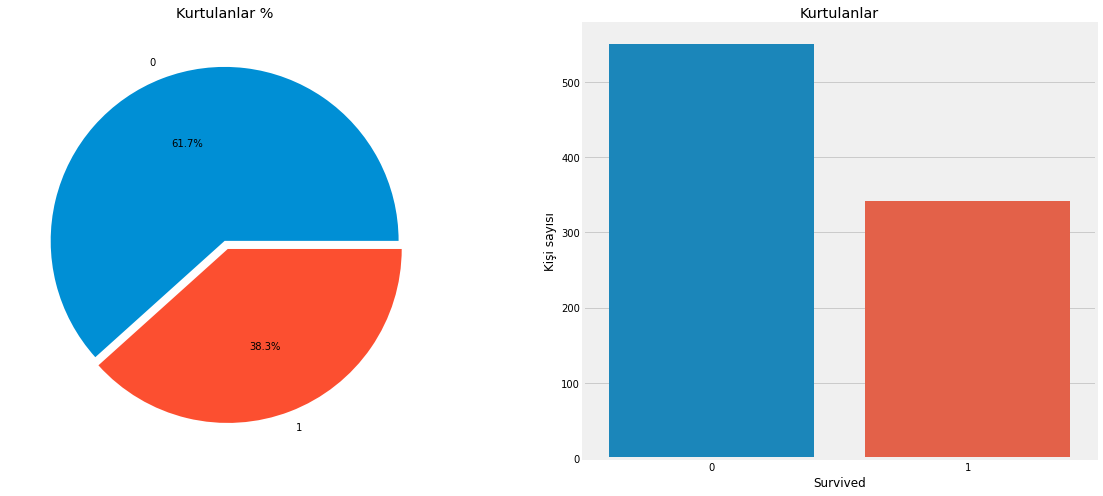

In [ ]:
# Kaç kişi kurtuldu?
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', explode=[0,0.05])
ax[0].set_title('Kurtulanlar %')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Kurtulanlar')
ax[1].set_ylabel('Kişi sayısı')
plt.show()

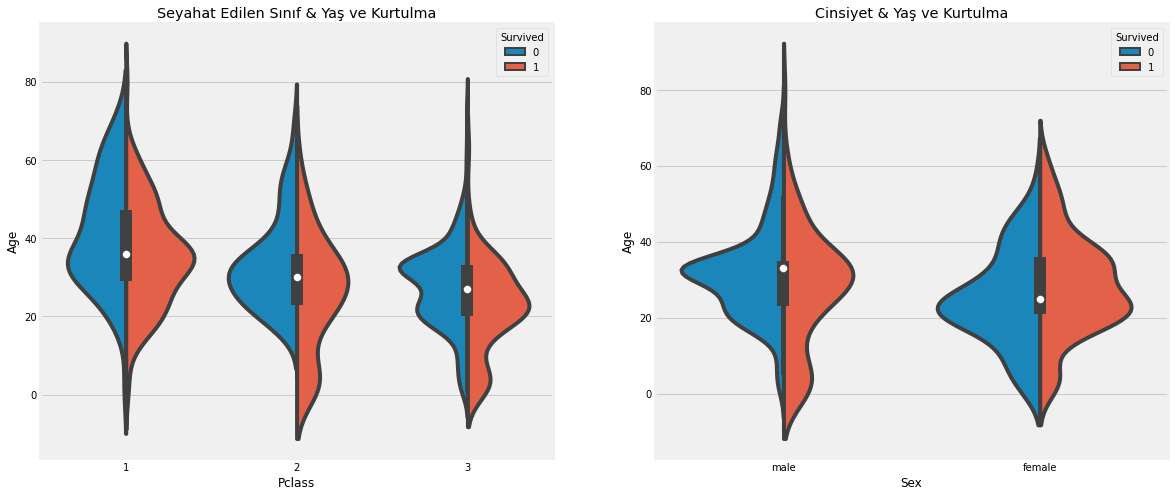

In [ ]:
# Yaş nasıl etkiliyor?
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Seyahat Edilen Sınıf & Yaş ve Kurtulma')
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Cinsiyet & Yaş ve Kurtulma')
plt.show()

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
Initial          0
dtype: int64

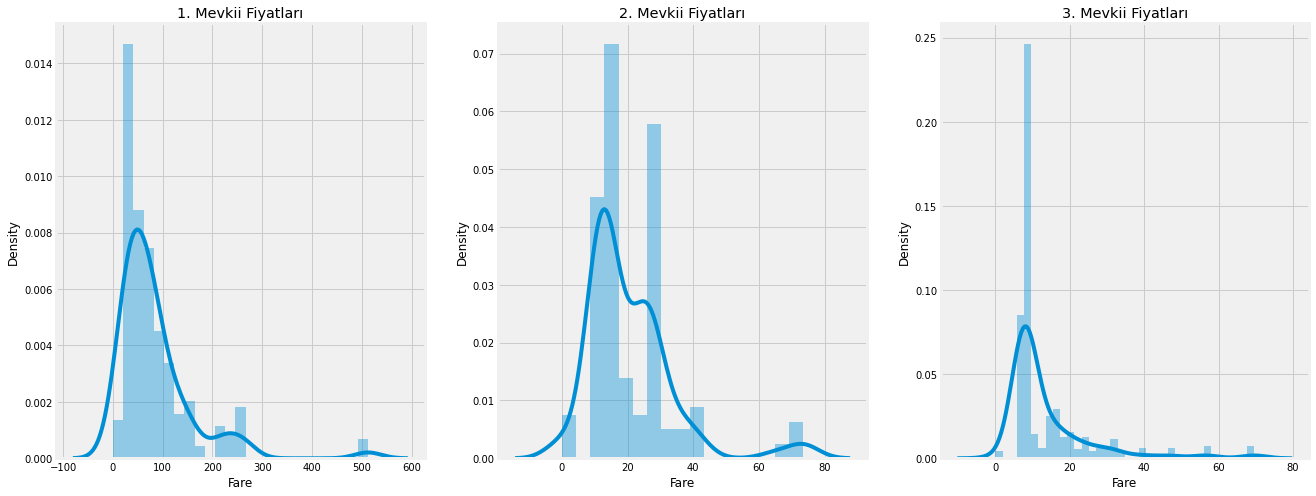

In [ ]:
# Bilet fiyatı grafiği
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('1. Mevkii Fiyatları')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('2. Mevkii Fiyatları')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('3. Mevkii Fiyatları')
plt.show()


# **SONUÇ**

In [ ]:
# EDA Sonuçlarımız
# 1. Kadınların erkeklere oranla kurtulma ihtimalleri çok daha yüksek.
# 2. Seyahat edilen mevkii kurtulma olasılığını etkiliyor. 
#    Örneğin, 1. mevkii'de yolculuk eden kadınların kurtulma oranı 3. mevkiiye göre çok daha yüksek.
# 3. Çocukların kurtulma oranı çok yüksek